
## Request: Vision Zero View From Sip Portal

### 1. VZV needs project id, name, manager,  year, vz status, vz type, unit, unit type, nodeid/segmentid, geom
### 2. Only Completed Vision Zero Projects of current year
### 3. Database: dotpgsql01, SIP
### 4. Tables: SIP_Projects, SIP_Projects_GEO, SIP_Lookup 




In [1]:
from ris import db2  #library designed for SQL database connection and querying
from IPython.display import clear_output
import datetime 
from datetime import date
import pandas as pd
from pandas import DataFrame
import xlsxwriter
import numpy as np
import os
from sqlalchemy import create_engine


clear_output()
timestamp = datetime.datetime.now().strftime('%Y-%m-%d %H:%M')
print 'Notebook run: {}'.format(timestamp)
print os.getcwd()
# %load_ext sql 

Notebook run: 2019-06-21 12:05
C:\Users\soge\Desktop\Jupyter\Requests\AG\SIP_to_VZV


In [3]:
#Database connections
#db = db2.PostgresDb('dotdevpgsql02', 'GISGRID', quiet = True)
db = db2.PostgresDb('dotdevpgsql02', 'CRASHDATA', quiet = True)
pgdb = db2.PostgresDb('dotpgsql01', 'sip', quiet = True)


#DONE FROM SIP Database

User name (CRASHDATA):soge
Password (CRASHDATA)········
User name (sip):soge
Password (sip)········


In [48]:
#date.today(today.year, today.month, 1) 
#date2 = date(today.year, today.month, 1) - datetime.timedelta(1)
#date2

datetime.date(2019, 5, 31)

In [4]:
def mrf_month():
    today = date.today()
    try:
        tm = datetime.datetime(today.year, today.month, today.day+1)
        lim= date(today.year, today.month, 1) - datetime.timedelta(1)
    except ValueError:
        lim= today
    return(str(lim))

mrf_month()


'2019-05-31'

### Table containing all 2019 Sip VZV Projects 

#This table includes project id, name, manager, year, vz status, vz type, unit, unit type, segmentid, geom

#This table only contains projects that are segments 

In [5]:
sip_segs = [(db2.query_to_table(pgdb, """

                SELECT sp.pid, sp.pjct_name, sp.pm, sp.sip_year, sp.vz_status VZ_Status, spl.type VZ_Type, sp.unit Unit, spl2.type Unit_Type, spg.segmentid, spg.geom
                FROM public.sip_projects sp
                join public.sip_projects_geo spg
                on sp.pid=spg.pid_fk
                join public.sip_lookup spl
                on sp.vz_status::varchar = spl.lookupid::varchar
                join public.sip_lookup spl2
                on sp.unit::varchar = spl2.lookupid::varchar 
                where sp.status= '15'
                and sp.vz_status != '23'
                and spg.nodeid=0
                and sp.end_date<'{}'::date 
                order by sp.end_date""".format(mrf_month()))
              ), (str(os.getcwd()) + '\sip_segs' + str((datetime.datetime.now().strftime("_%Y-%m-%d"))) + '.csv')]
#print(sip_segs)

#This table only contains projects that are nodes

In [6]:
sip_nodes = (db2.query_to_table(pgdb, """
                SELECT sp.pid, sp.pjct_name, sp.pm, sp.sip_year, sp.vz_status VZ_Status, spl.type VZ_Type, sp.unit Unit, spl2.type Unit_Type, spg.nodeid, st_setsrid(spg.geom,2263)
                FROM public.sip_projects sp
                join public.sip_projects_geo spg
                on sp.pid=spg.pid_fk
                join public.sip_lookup spl
                on sp.vz_status::varchar = spl.lookupid::varchar
                join public.sip_lookup spl2
                on sp.unit::varchar = spl2.lookupid::varchar 
                where sp.status= '15'
                and sp.vz_status != '23'
                and spg.segmentid=0
                and sp.end_date<'{}'::date 
                order by sp.end_date""".format(mrf_month()))
              )
print(sip_nodes)


     

      pid                                          pjct_name          pm  \
0    1296                                    43 St and 9 Ave       ghaas   
1     823                       Northern Boulevard & 61st St    cbrunson   
2     821                      Ocean Parkway & Church Avenue     bschwed   
3     821                      Ocean Parkway & Church Avenue     bschwed   
4     821                      Ocean Parkway & Church Avenue     bschwed   
5     826                       46th Street and Queens Blvd.  jcronstein   
6     863                 Myrtle Ave-Wyckoff Ave-Palmetto St     agetman   
7    1306                               Broadway and Dyckman       hpark   
8     828                        40th Street and Queens Blvd  jcronstein   
9     828                        40th Street and Queens Blvd  jcronstein   
10    828                        40th Street and Queens Blvd  jcronstein   
11   1094                    Queens Boulevard at 71st Avenue     naltmix   
12   1094   

In [ ]:
#Testing
#sip_shps(pgtb):
 
#sip_segs[0].to_csv(sip_segs[1],index=False)


#Testing

#sip_segs[0].to_sql(name='sips_segs', con=db, if_exists = 'replace', index=False)


#cmd = '''ogr2ogr -overwrite -f \"ESRI Shapefile\" {export_path}{pgtable_name}.shp

#Testing

#cmd = 'ogrinfo -ro -al test.csv -oo X_POSSIBLE_NAMES=Lon* -oo Y_POSSIBLE_NAMES=Lat* -oo KEEP_GEOM_COLUMNS=NO'


#print(os.system(cmd))
#print 'Done!'

#Testing

#def export_pg_table(self, export_path, host, username, password, db, pg_sql_select):
        
#        print "Exporting shapefile using the ", geom, "geometry field..."
#        cmd = '''ogr2ogr -overwrite -f \"ESRI Shapefile\" 
#        {export_path}.shp " 
#        -sql "{pg_sql_select}"'''.format(export_path = export_path)  
                                         
#        os.system(cmd)



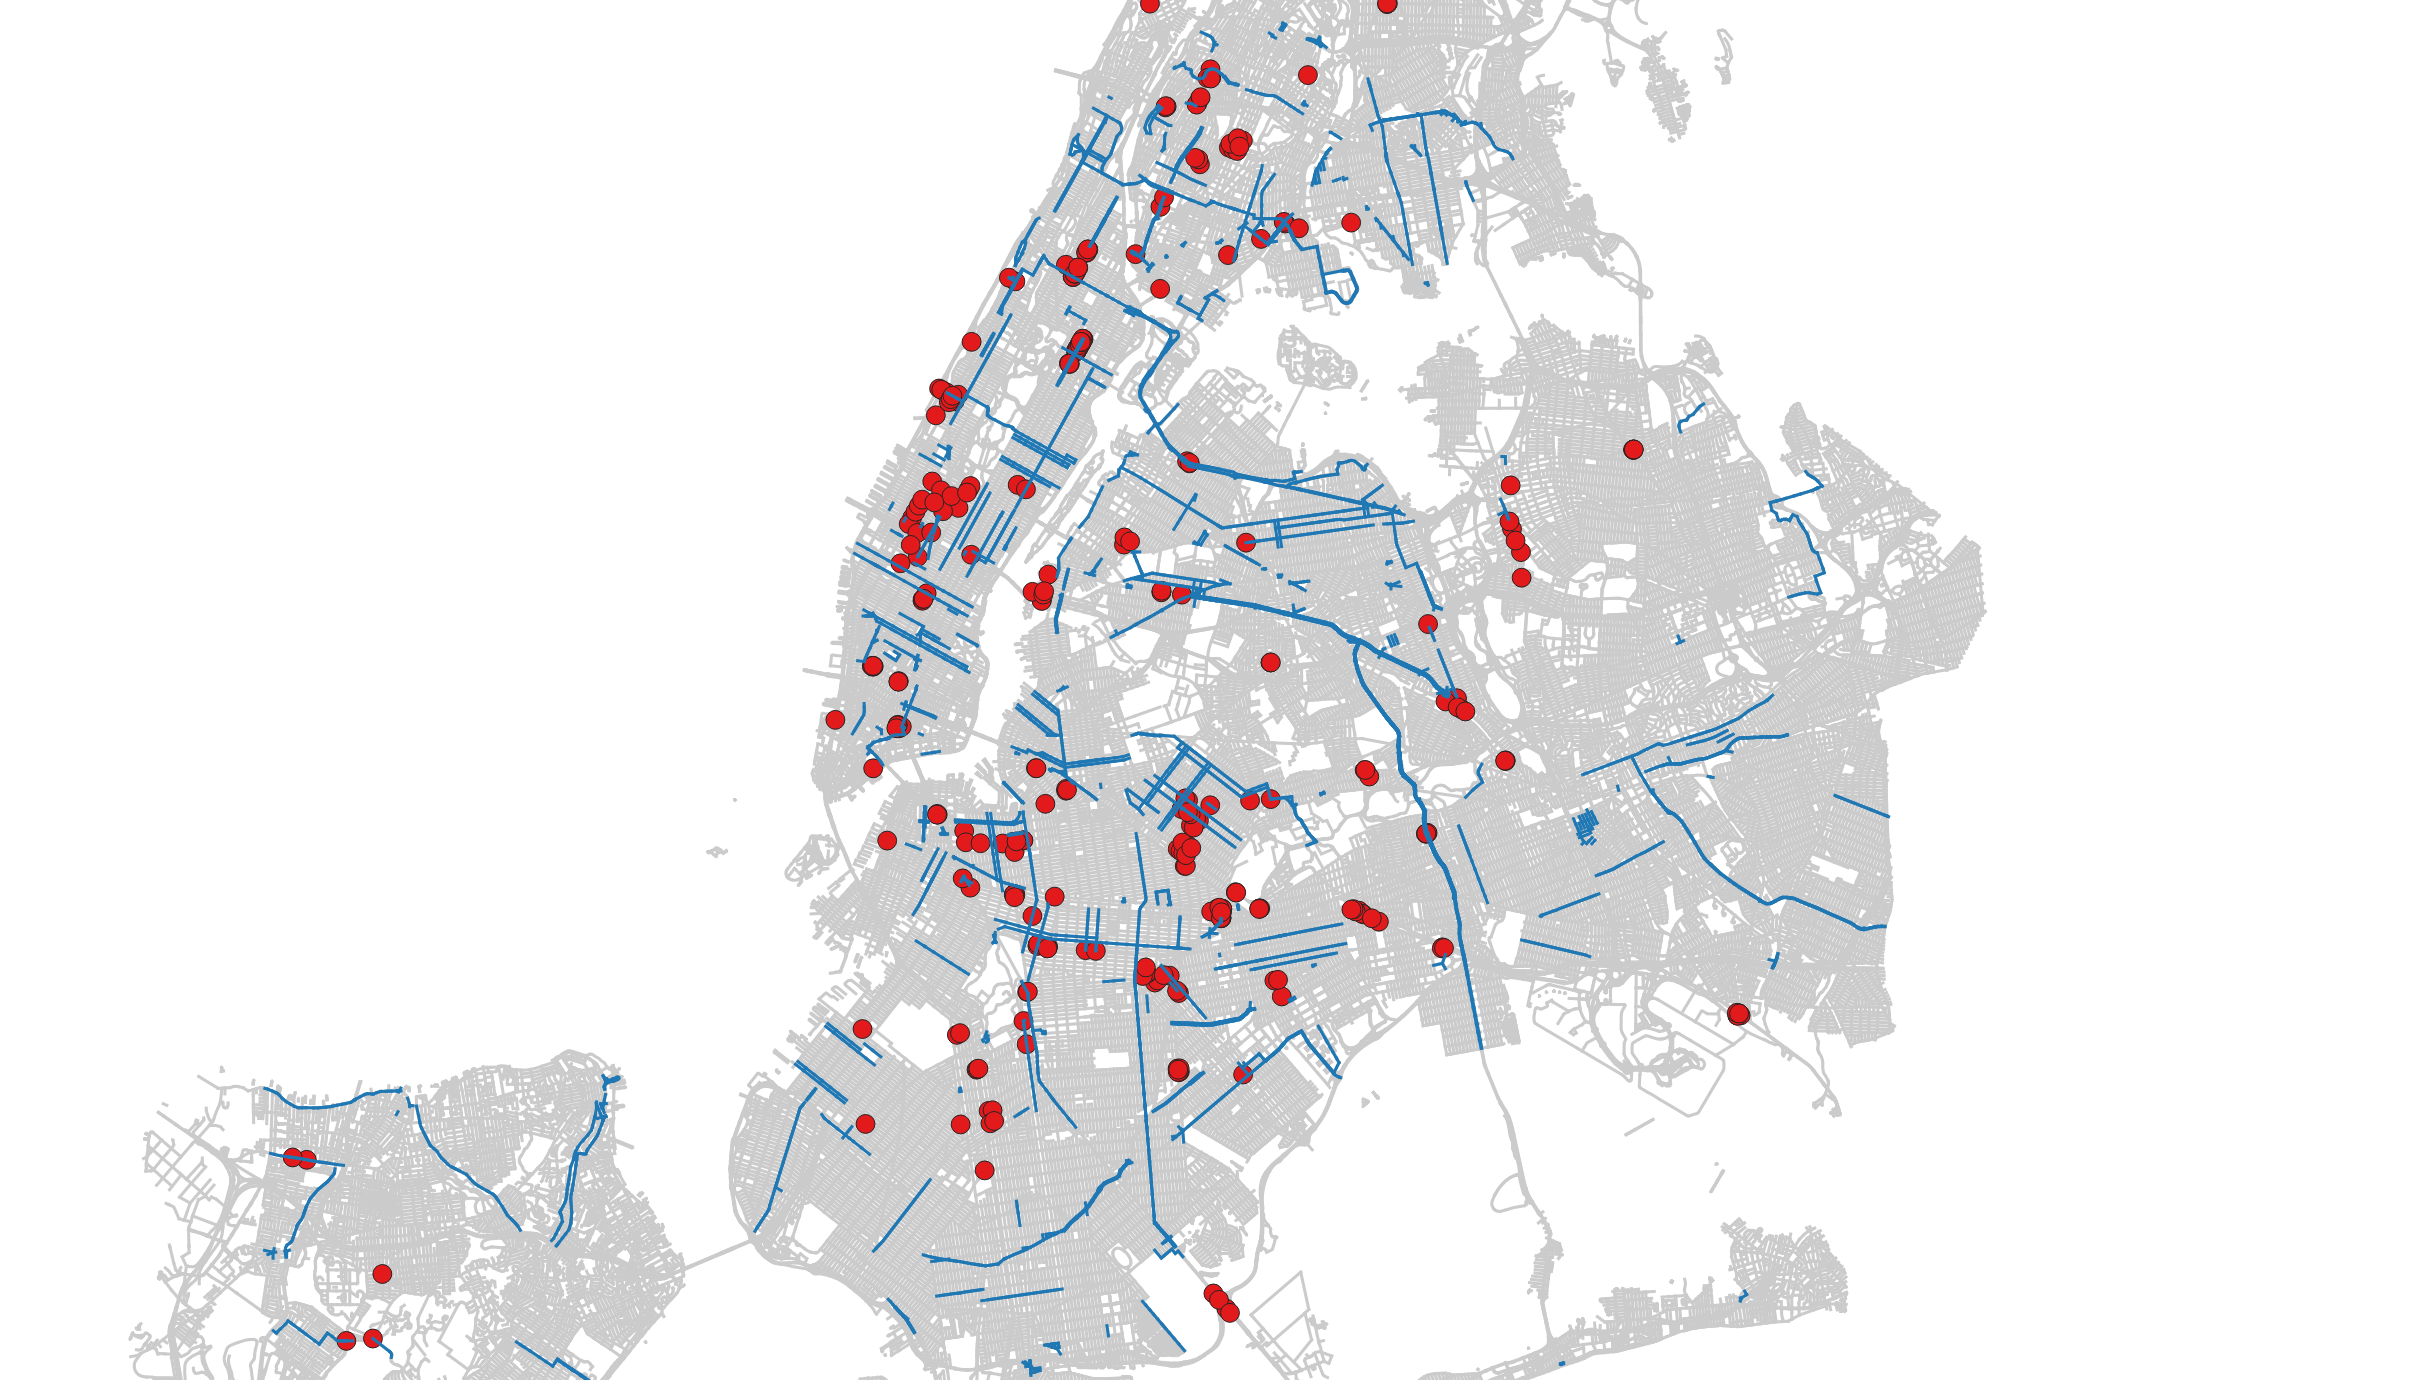

In [61]:
from IPython.display import Image
PATH = "C:\Users\soge\Desktop\Jupyter\Requests\AG\SIP_to_VZV"
Image(filename = PATH + "\SIP_to_VZV619.png", width=1000, height=1000)

In [ ]:
db2.pg_shp.export_pg_table_to_shp(r'\\Users\soge\Desktop\Jupyter\Requests\AG\SIP_to_VZV\Sip_to_VZV_shps',
    pg_db,'v_mcd'
    )